In [1]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


import spacy
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
parser = English()
nlp = spacy.load('en')

In [38]:
#WE HAVE USED [encoding = "ISO-8859-1"] TO AVOID UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte
spamCompleteData = pd.read_csv('C:/Users/Lenovo/Desktop/IPY/Data/Data/spam.csv', encoding = 'latin-1')

In [39]:
len(spamCompleteData)

5572

#### Intention is to break the complete dataset into data(for training and validation) + untouched data

In [40]:
data = spamCompleteData.head(5550)

In [41]:
untouchedTestData = spamCompleteData.tail(22)

#### Removing unwanted columns

In [42]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
untouchedTestData = untouchedTestData.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

#### Introducing Column labels

In [43]:
data.columns = ['STATUS','MESSAGE']
untouchedTestData.columns = ['STATUS','MESSAGE']

#### Converting Categorical Feature into Numerical Feature
## SPAM = 0 | HAM = 1

In [44]:
data = data.replace({'STATUS':{'spam':0,'ham':1}})
untouchedTestData = untouchedTestData.replace({'STATUS':{'spam':0,'ham':1}})

#### The result looks like -

In [45]:
data.head(5)

,STATUS,MESSAGE
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
untouchedTestData.head(5)

,STATUS,MESSAGE
5550,1,"Cool, what time you think you can get here?"
5551,1,Wen did you get so spiritual and deep. That's ...
5552,1,Have a safe trip to Nigeria. Wish you happines...
5553,1,Hahaha..use your brain dear
5554,1,Well keep in mind I've only got enough gas for...


# ---------------------------------------------------------------------------------

In [51]:
#COUNT OF SPAM ENTERIES IN TRINING DATA
print(len(data[data['STATUS'] == 0]))
#COUNT OF HAM ENTERIES IN TRINING DATA
print(len(data[data['STATUS'] == 1]))

745
4805


In [52]:
4805+745

5550

In [53]:
#COUNT OF SPAM ENTERIES IN UNTOUCHED DATA SET 
print(len(untouchedTestData[untouchedTestData['STATUS'] == 0]))
#COUNT OF HAM ENTERIES IN UNTOUCHED DATA SET
print(len(untouchedTestData[untouchedTestData['STATUS'] == 1]))

2
20


In [54]:
2+20

22

In [62]:
countVect = CountVectorizer()

In [63]:
train_X, test_X, train_y, test_y = train_test_split(data["MESSAGE"], data["STATUS"], test_size=0.2, random_state=4)

# 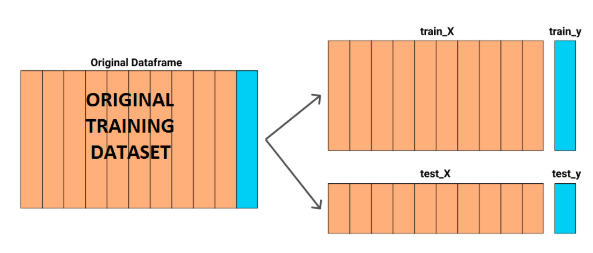

In [64]:
#JUST FOR UNDERSTANDING PURPOSE

# bag_of_words=count.fit_transform(x_train)
# print(bag_of_words)
# feature_names = count.get_feature_names()
# print([feature_names])
#pd.DataFrame(bag_of_words.toarray(), columns=feature_names)

In [68]:
train_X.head()

1009    Dear Hero,i am leaving to qatar tonite for an ...
3898    ÌÏ mean it's confirmed... I tot they juz say o...
5439         Hey i've booked the 2 lessons on sun liao...
5459    If you hear a loud scream in about &lt;#&gt; m...
1693    Was gr8 to see that message. So when r u leavi...
Name: MESSAGE, dtype: object

In [69]:
train_CV_X=countVect.fit_transform(train_X)

In [70]:
array=train_CV_X.toarray()

In [71]:
array[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
x_testCount=count.transform(x_test)

NotFittedError: CountVectorizer - Vocabulary wasn't fitted.

In [ ]:
pd.DataFrame(x_testCount.toarray(), columns=feature_names)

In [72]:
mnb = MultinomialNB()

In [73]:
y_train=y_train.astype('int')

In [74]:
mnb.fit(x_trainCount,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [75]:
testmessage=x_test.iloc[0]

In [76]:
predictions=mnb.predict(x_testCount)

In [77]:
count=0

In [78]:
for i in range (len(predictions)):
    if predictions[i]==a[i]:
        count=count+1

NameError: name 'a' is not defined

In [47]:
count

0

In [271]:
len(predictions)

1115

In [272]:
count/len(predictions)

0.9820627802690582

In [53]:
bag_of_words = count.fit_transform(text_data)
print(bag_of_words)
feature_names = count.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns=feature_names)

NameError: name 'text_data' is not defined

In [ ]:
https://github.com/shreyans29/thesemicolon/blob/master/Text%20Analytics%20CV.ipynb